In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 3.1 선형 기저 함수 모델

선형 회귀모델(Linear regression)

$$y(\mathbf{x}, \mathbf{w}) = w_0 + w_1 x_1 + w_2 x_2 \cdots + w_D x_D \\ \text{where }\mathbf{x} = (x_1, x_2, \cdots, x_D)^T$$

* 특징: 매개변수 $w_0, w_1, \cdots, w_D$ 의 선형함수이자, 입력변수 $x_i$ 의 선형함수

입력변수 $x_i$ 의 선형함수라는 한계점 때문에 입력변수를 고정 비선형 함수를 사용함

$$y(\mathbf{x}, \mathbf{w}) = w_0 + \sum_{j=1}^{M-1}w_j\phi_j(x)$$

* $\phi_j(x)$: 기저함수(basis function), 입력 변수를 비선형으로 바꿔준다.
* $w_0$: 편향(bias), 데이터의 고정된 오프셋을 표현하게 해줌 

선형 함수의 판단 여부는 매개변수 $\mathbf{w}$ 에 대한 선형 결합이기 때문이기에 선형 함수라고 하는 것

편의를 위해 편향에도 기저함수 $\phi_0(x)=1$ 를 정의하면 수식은 다음과 같이 변한다.

$$y(\mathbf{x}, \mathbf{w}) = \sum_{j=0}^{M-1}w_j\phi_j(x) = \mathbf{w}^T \phi(\mathbf{x}) \\ 
\text{where } \begin{aligned}\mathbf{w} &= (w_0, w_1, \cdots, w_{M-1})^T\\ \mathbf{\phi} &= (\phi_0, \phi_1, \cdots, \phi_{M-1})^T\end{aligned}$$

---

이제부터 타겟 변수 $t$ 는 결정 함수 $y(\mathbf{x}, \mathbf{w})$ 와 평균이 $0$, 정밀도 $\beta$를 가지는 가우시안 노이즈 $\epsilon$의 합으로 주어진다고 가정하고 선형 회귀 모델의 가중치를 구해본다. 

$$t = y(\mathbf{x}, \mathbf{w}) + \epsilon, \quad \text{where } \epsilon \sim \mathcal{N}(0, \beta^{-1}) \quad \cdots(3.8)$$

따라서 $t$ 또한 확률변수로 적을 수 있으며 다음과 같다.

$$p(t\vert \mathbf{x}, \mathbf{w}, \beta) = \mathcal{N}(t \vert y(\mathbf{x}, \mathbf{w}), \beta^{-1})$$

제곱 오류 함수를 가정할 경우, 최적의 예측값은 타겟 변수의 조건부 기대값으로 주어진다. 

* 기댓값: 각 사건이 벌어졌을 때의 이득과 그 사건이 벌어질 확률을 곱한 것을 전체 사건에 대해 합한 값이다. 
    * 사건: 변수 x가 어떤 값을 가질 때
    * 이득: x를 입력으로 하는 t의 값
    * 확률: 이득이 일어날 확률

$$\Bbb{E}[t\vert x] = \int t p(t\vert x) dt = y(\mathbf{x}, \mathbf{w})$$

## 가능도 함수

다변량에 대해서, 데이터 집합 $X = \{ \mathbf{x}_1, \cdots , \mathbf{x}_N\}$ (matrix) 과 그에 해당하는 타겟 변수 집합 $\mathbf{t} = \{t_1, \cdots, t_N\}$ (vector)이 각각 수식 (3.8)에서 독립적으로 추출 되었다는 가정하에서 가능도 함수는 모든 데이터 포인트($n=1\~N$)에서 각 수식 (3.8) 확률의 곱을 만족해야한다. 수식으로 다음과 같다.

$$\begin{aligned}
\text{likelihood} = p(\mathbf{t} \vert X, \mathbf{w}, \beta) &= \prod_{n=1}^{N} \mathcal{N}(t_n \vert y(\mathbf{x}_n, \mathbf{w}), \beta^{-1}) \\
&= \prod_{n=1}^{N} \mathcal{N}(t_n \vert \mathbf{w}^T\phi(\mathbf{x}_n), \beta^{-1})
\end{aligned}$$

입력 변수는 항상 들어가기 때문에 이제부터 수식에 $\mathbf{x}$ 를 빼고 진행할 것이다. 계산 편의상 가능도 함수에 단조함수인 $\log$ 를 취한다.

$$\begin{aligned}
\text{log likelihood} = L = \ln p(\mathbf{t} \vert \mathbf{w}, \beta) &= \sum_{n=1}^{N} \ln \mathcal{N}(t_n \vert \mathbf{w}^T\phi(\mathbf{x}_n), \beta^{-1}) \\
&= \dfrac{N}{2} \ln \beta - \dfrac{N}{2} \ln (2\pi) - \beta E_D(\mathbf{w})
\end{aligned}$$

여기서 $n$과 연관있는 항 $E_D(\mathbf{w}) = \dfrac{1}{2} \sum_{n=1}^N \{ t_n - \mathbf{w}^T \phi(\mathbf{x}_n)\}^2$ 는 제곱합 오류 함수다.

* 단변량 가우시안 분포: $\mathcal{N}(x \vert \mu, \sigma) = \dfrac{1}{(2 \pi \sigma)^{1/2}} \exp \left\{-\dfrac{1}{2 \sigma^2} (x-\mu)^2 \right\}$ 
* 로그 취하면: $\ln \mathcal{N}(x \vert \mu, \sigma) = -\dfrac{1}{2}\ln(2\pi) + \dfrac{1}{2} \ln(\sigma^{-1}) -\dfrac{1}{2 \sigma^2} (x-\mu)^2 $

## 최대 가능도 추정(MLE, Maximum Likelihood Estimation)

$\mathbf{w}$ 에 대해 극대화 하면, 사실상 $\mathbf{w}$ 를 포함한 제곱합 오류 함수를 미분하는 것과 같다. 

$$\begin{aligned}
\dfrac{\partial L}{\partial \mathbf{w}} = \triangledown \ln p(\mathbf{t} \vert \mathbf{w}, \beta) &= \beta \sum_{n=1}^{N} \{ t_n - \mathbf{w}^T \phi(\mathbf{x_n})\} \phi(\mathbf{x_n})^T = 0
\end{aligned}$$

$\mathbf{w}$ 에 대해 풀면 $\mathbf{w}_{MLE} = (\Phi^T\Phi)^{-1}\Phi^T \mathbf{t}$ 가 나오며, 이를 정규 방적식(normal equation)이라 한다. $\Phi$ 는 설계 행렬(design matrix이라고 하며 $N \times M$ 크기를 가진다.

$$\Phi = \begin{bmatrix} 
\phi_0(x_1) & \phi_1(x_1) & \cdots & \phi_{M-1}(x_1) \\
\phi_0(x_2) & \phi_1(x_2) & \cdots & \phi_{M-1}(x_2) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_0(x_N) & \phi_1(x_N) & \cdots & \phi_{M-1}(x_N)
\end{bmatrix}$$

## 다변량 MLE

* 다변량 가우시안 분포: $\mathcal{N}(\mathbf{x} \vert \mu, \Sigma) = \dfrac{1}{(2 \pi)^{D/2}}\dfrac{1}{(\Sigma)^{1/2}} \exp \left\{-\dfrac{1}{2} (\mathbf{x}-\mu)^T\Sigma^{-1} (\mathbf{x}-\mu) \right\}, \quad \text{where } D = \text{dimension of }\mathbf{x}$ 
* 로그 취하면: $\ln \mathcal{N}(\mathbf{x} \vert \mu, \Sigma) = -\dfrac{D}{2}\ln(2\pi) + \dfrac{1}{2} \ln(\Sigma^{-1}) -\dfrac{1}{2} (\mathbf{x}-\mu)^T\Sigma^{-1} (\mathbf{x}-\mu) $

Trace trick

In [5]:
x_mu = np.array([[5], [2]])
beta = np.array([[1, 2,], [2, 4]])
print(f"(x-mu)^T beta (x-mu): {x_mu.T.dot(beta).dot(x_mu)}")
print(f"Tr(beta (x-mu)(x-mu)^T) : {np.trace(beta.dot(x_mu).dot(x_mu.T))}")

(x-mu)^T beta (x-mu): [[81]]
Tr(beta (x-mu)(x-mu)^T) : 81


In [16]:
w = np.array([[1, 2, 3]]) # 2(M) x 3(k)
beta = np.array([[1, 2, 4], 
                 [2, 4, 5], 
                 [4, 5, 9]])
phi = np.array([[1], [4]])
print(f"1: {phi.T.dot(w).dot(beta).dot(w.T).dot(phi)}")
print(f"2: {np.trace(w.T.dot(phi).dot(phi.T).dot(w).dot(beta))}")

1: [[19894]]
2: 19894


# 3.3 베이지안 선형 회귀

가능도 함수를 최대화하는 방식으로 문제를 풀면 언제나 과적합에 해당하는 아주 복잡한 모델을 선택한다. validation 데이터를 둬서 이를 방지할 수 있지만, 그보다는 베이지안 방법론으로 과적합 문제를 피할 수 있으며 훈련 데이터만 가지고 모델의 복잡도를 결정할 수 있다.

## 베이지안 추정의 프로세스(수정)

알아둬야할 공식

$ \begin{aligned} 
p(\mathbf{x}) &= \mathcal{N}(\mathbf{x} \vert \mu, \Lambda^{-1}) \\
p(\mathbf{y} \vert \mathbf{x}) &= \mathcal{N}(\mathbf{y} \vert A\mathbf{x}+b, L^{-1}) \\
p(\mathbf{y}) &= \mathcal{N}(\mathbf{y} \vert A\mu+b, L^{-1}+A\Lambda^{-1}A^T) \\
p(\mathbf{x} \vert \mathbf{y}) &= \mathcal{N}(\mathbf{x} \vert \Sigma\{A^T L(\mathbf{y}-b) + \Lambda \mu\}, \Sigma )\\
& \text{where } \Sigma = (\Lambda + A^T L A)^{-1}
\end{aligned}$

## 매개변수 분포

모델의 매개변수 분포 $\mathbf{w}$에 사전 확률 분포(prior distribution)을 도입해본다.

### 사전 켤례 분포(Congungate Prior):

$$p(\mathbf{w}) = \mathcal{N}(\mathbf{w} \vert m_0, S_0)$$

* $n=0$ 아직 데이터가 주어지지 않았을 때, $m_0$: 평균, $S_0$: 공분산

### 사후 분포(Posterior)

$$\begin{aligned} 
p(\mathbf{w} \vert \mathbf{t}) &= \mathcal{N}(\mathbf{w} \vert m_N, S_N)\\
&= \mathcal{N}(\mathbf{t}\vert w^T\phi(\mathbf{x}), \beta^{-1})\mathcal{N}(\mathbf{w} \vert m_0, S_0)
\end{aligned}$$

* $n=N$ 데이터를 전부 사용한 경우, $m_N$: 평균, $S_N$: 분산

* 위 공식에 의해서 평균과 분산: 
$\begin{aligned}m_N &= S_N(S_0^{-1}m_0 + \beta\Phi^T\mathbf{t})\\
S_N^{-1} &= S_0^{-1} + \beta \Phi^T\Phi\end{aligned}$

* http://www.cs.utoronto.ca/~radford/csc2541.S11/week6.pdf

조금더 쉽게 계산을 위해 평균을 0, 단일 정밀도 매개변수 $\alpha$ (단일 스칼라값)에 결정되는 등방 가우시안 분포로 사전분포를 만든다.

$$p(\mathbf{w} \vert \alpha) = \mathcal{N}(\mathbf{w}\vert 0, \alpha^{-1}\mathbf{I})$$

따라서 사후 분포의 평균과 분산은 다음과 같이 변한다. 

$$\begin{aligned}m_N &= \beta S_N\Phi^T\mathbf{t}\\
S_N^{-1} &= \alpha\mathbf{I}+\beta \Phi^T\Phi\end{aligned}$$

사전 분포가 가우시안 분포이기 때문에 최빈값과 평균값이 일치한다. 따라서 최대 사후 가중 벡터는 단순히 $w_{MAP} = m_N$ 이 된다

# 데이터

단순 직선 피팅을 예시로 들어보자.


$$\begin{aligned}
\text{model function}&: y(x, \mathbf{w}) = w_0 + w_1 x\\
\text{real function} &: t(x, \mathbf{a}) = y(x, \mathbf{a}) + \eta = a_0 + a_1 x +\eta
\end{aligned}$$


$\begin{aligned}
x_n &\sim U(x \vert -1, 1) \\
t_n &= t(x, \mathbf{a}) = a_0 + a_1 x +\eta\\
\quad& \eta \sim \mathcal{N}(0, \sigma^2), \quad \text{where }\sigma=0.2 \\
\quad& a = (a_0, a_1) = (-0.3, 0.5) \\
\end{aligned}$

* given $\beta = \sigma^{-2} = 25$, calculate $w$

x = 
[-0.69 -0.4  -0.88 -0.08  0.67  0.85  0.45  0.54 -0.46  0.29 -0.81 -0.84
  0.18 -0.31  0.98  0.25  0.36  0.1  -0.46 -0.25]
t = 
[-0.67 -0.52 -0.79 -0.36  0.07  0.14 -0.13 -0.   -0.51 -0.17 -0.7  -0.78
 -0.11 -0.44  0.18 -0.17 -0.08 -0.25 -0.55 -0.41]


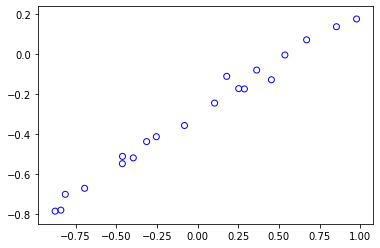

In [22]:
np.random.seed(777)
N = 20  # data points
a = np.array([-0.3, 0.5])  # the real weight
sigma = 0.2
def model_function(x, w, add=True):
    """
    **only support single variable**
    function: f(x, a)
    add: if x doesn't contain 1 vector for bias term, 
         automatically create it
    """
    if add:
        N = x.shape[0]
        x = np.c_[ np.ones(N), x ] # (N, 2)
        
    return x.dot(w)

x = np.random.uniform(low=-1, high=1, size=(N,))
eta = np.random.normal(scale=sigma**2, size=(N,))
t = model_function(x, a, add=True) + eta
print(f"x = \n{x.round(2)}")
print(f"t = \n{t.round(2)}")
plt.scatter(x, t, edgecolors="b", facecolors="none", marker="o")
plt.show()

In [43]:
def Gaussian(x, mean, cov):
    """
    x : last dimension must be number of variable demension (*batch, 1, D), 
        D is dimension of random variable x
        For instance 1-D shape should be (N, 1, 1)
        support if `x.ndim == 1` automatically change to (batch, 1, 1)
    mean : D-dimension mean vector
    cov : covariance
    """
    assert isinstance(x, np.ndarray), "input must be np.ndarray"
    # change dimension for 1-D array
    if x.ndim == 1:
        x = x.reshape(x.size, 1, 1)
        if not isinstance(cov, np.ndarray):
            cov = np.array([[cov]])
        elif (cov.ndim == 1):
            cov = cov.reshape(1, 1)
    assert x.shape[-2] == 1, "must be a row vector, so x.shape[-2]==1"
    D = x.shape[-1]
    N_dims = len(x.shape)
    # mahalanobis distance: \Delta^2
    trans_axes = list(range(N_dims-2)) + [N_dims-1, N_dims-2]
    distance = np.squeeze((1/2)*np.matmul((x - mean).dot(np.linalg.inv(cov)), np.transpose((x - mean), axes=trans_axes)))
    return (2*np.pi)**(-D/2)*np.linalg.det(cov)**(-1/2)*np.exp(-distance)

In [79]:
# Give a simple Prior N(np.zeros(2), alpha*np.eye(2))

alpha = 2.0
beta = 1/sigma**2

mean_prior = np.zeros(2)
cov_prior = alpha**(-1) * np.eye(2)

def get_phi(x):
    N = x.shape[0]
    phi = np.c_[ np.ones(N), x ] # (N, 2)
    return phi

def Posterior_mu(x, cov, t, alpha, beta):
    # Phi
    phi = get_phi(x)
    return beta*cov.dot(phi.T).dot(t)

def Posterior_cov(x, alpha, beta):
    # Phi
    phi = get_phi(x)
    covinv = alpha*np.eye(phi.shape[1]) + beta*phi.T.dot(phi)
    return np.linalg.inv(covinv)

In [84]:
from matplotlib import cm

# Prior 
ws = np.linspace(-1, 1, 100)
wx, wy = np.meshgrid(ws, ws)
W = np.dstack([wx, wy])[:, :, np.newaxis]
prior_g = Gaussian(W, mean=mean_prior, cov=cov_prior)

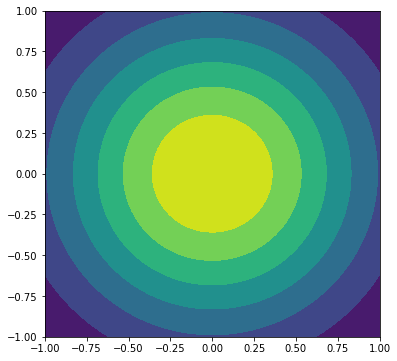

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
cset = ax.contourf(wx, wy, prior_g)
plt.show()

In [98]:
# calculate post dist parameters for all datas
cov_post = Posterior_cov(x, alpha, beta)
mean_post = Posterior_mu(x, cov_post, t, alpha, beta)
posterior_g = Gaussian(W, mean=mean_post, cov=cov_post)

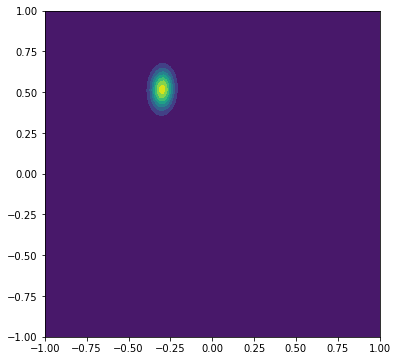

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
cset = ax.contourf(wx, wy, posterior_g)
plt.show()

$$\begin{aligned}
\text{log likelihood} = L = \ln p(\mathbf{t} \vert \mathbf{w}, \beta) &= \sum_{n=1}^{N} \ln \mathcal{N}(t_n \vert \mathbf{w}^T\phi(\mathbf{x}_n), \beta^{-1}) \\
&= \dfrac{N}{2} \ln \beta - \dfrac{N}{2} \ln (2\pi) - \beta E_D(\mathbf{w})
\end{aligned}$$

여기서 $n$과 연관있는 항 $E_D(\mathbf{w}) = \dfrac{1}{2} \sum_{n=1}^N \{ t_n - \mathbf{w}^T \phi(\mathbf{x}_n)\}^2$ 는 제곱합 오류 함수다.

## online-learning

In [ ]:
def extract_weight(ws, prior):
    w0_idx, w1_idx = np.unravel_index(np.argmax(prior), prior.shape)
    w = np.array([ws[w0_idx], ws[w1_idx]])
    return w

In [89]:
w_sample = np.random.multivariate_normal(mean_prior, cov_prior, size=5)

array([[-0.19911014,  1.23351434],
       [-0.47675891,  0.4160625 ],
       [ 1.27587764,  1.4539885 ],
       [ 1.02854457, -0.09787185],
       [ 0.24244703, -0.51450396]])

In [155]:
# Prior 
alpha = 2.0
beta = 1/sigma**2
mean_prior = np.zeros(2)
cov_prior = alpha**(-1) * np.eye(2)

ws = np.linspace(-1, 1, 100)
wx, wy = np.meshgrid(ws, ws)
W = np.dstack([wx, wy])[:, :, np.newaxis]

prior_g = Gaussian(W, mean=mean_prior, cov=cov_prior)

his = {
    "mean": [mean_prior], 
    "cov": [cov_prior], 
    "g": [prior_g], 
    "likelihood": [None],
}

mean = mean_prior
cov = cov_prior
for step, (x_i, t_i) in enumerate(zip(x, t)):
    x_i = np.array([x_i])
    t_i = np.array([t_i])
    
    cov = Posterior_cov(x_i, alpha, beta)
    mean = Posterior_mu(x_i, cov, t_i, alpha, beta)
    posterior_g = Gaussian(W, mean=mean, cov=cov)
    
    likelihood = get_likelihood_all_W(x_i, W)
    
    his["mean"].append(mean)
    his["cov"].append(cov)
    his["g"].append(posterior_g)
    his["likelihood"].append(likelihood)
    
    # sample from mean & cov
    # w_sample = np.random.multivariate_normal(mean, cov, size=5)
    

[-0.36178435  0.09170554]


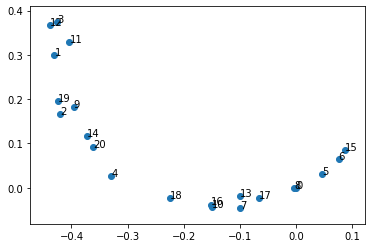

In [172]:
fig, ax = plt.subplots(1, 1)
ms = np.vstack(his["mean"])

ax.scatter(ms[:, 0], ms[:, 1])
for i, a in enumerate(ms):
    plt.annotate(str(i), (a[0], a[1]))
# ax.set_xlim(-1, 1)
# ax.set_ylim(-1, 1)
print(ms[-1])

In [152]:
def get_likelihood_all_W(x, W, add=True):
    W = np.squeeze(W)  # 100, 100, 2
    N1, N2 = W.shape[:-1]
    likelihood = np.zeros((N1, N2))
    for i in range(N1):
        for j in range(N2):
            likelihood[N1-1-i, N2-1-j] = model_function(x, W[i, j], add=add)
    return likelihood

In [153]:
likelihood = get_likelihood_all_W(x_i, W)

In [147]:
np.squeeze(W)[0, 0], np.squeeze(W)[0, 88]

(array([-1., -1.]), array([ 0.77777778, -1.        ]))

In [143]:
model_function(x_i, np.squeeze(W)[0, 0])

array([-0.30532747])

In [146]:
model_function(x_i, np.squeeze(W)[0, 88])

array([1.47245031])

In [137]:
Gaussian(t_i, mean_likelihood, beta**(-1))

0.006978138574030259

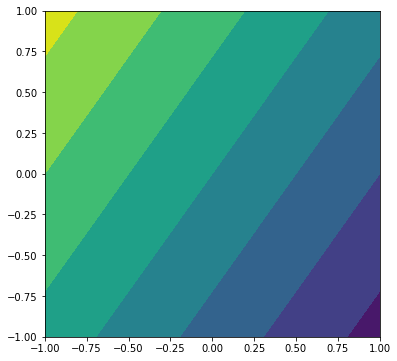

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
cset = ax.contourf(wx, wy, likelihood)
plt.show()

In [54]:
np.unravel_index(np.argmax(prior_g), prior_g.shape)

(49, 49)

In [68]:
def extract_weight(ws, prior):
    w0_idx, w1_idx = np.unravel_index(np.argmax(prior), prior.shape)
    w = np.array([ws[w0_idx], ws[w1_idx]])
    return w

In [69]:
w = extract_weight(ws, prior_g)

http://krasserm.github.io/2019/02/23/bayesian-linear-regression/